<a href="https://colab.research.google.com/github/Huniiiii/Data-Analysis-Using-Pandas/blob/main/DataAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all the packages

import pandas as pd # to organize data
import numpy as np #to organize data
import matplotlib.pyplot as plt
#visuliaztion(graph)
%matplotlib inline
# visuliaztion(graph)
import seaborn as sns
# visuliaztion(graph)

In [11]:
# read all three source data

df_geo = pd.read_csv("C:/Users/franc/Desktop/python_class/datasets/Data - Geo Info.csv")
df_orders = pd.read_csv("C:/Users/franc/Desktop/python_class/datasets/Data - Orders.csv")
df_quality = pd.read_excel("C:/Users/franc/Desktop/python_class/datasets/Data - Quality of Service.xlsx")

### ***Cleaning & Preparing Data***
1. #### Geo Data


In [12]:
# shape of the geo data # 262lines and 8 columns
df_geo.shape

(262, 8)

In [13]:
# checking columns
df_geo.columns

Index(['FSA', 'FSA Prefix', 'Province', 'FSA Type', 'Area', 'City Name',
       'District', 'Geo Area km2'],
      dtype='object')

In [14]:
# check info or data type
df_geo.dtypes

FSA             object
FSA Prefix      object
Province        object
FSA Type        object
Area            object
City Name       object
District        object
Geo Area km2    object
dtype: object

In [15]:
#statistical summary
df_geo.describe()

,FSA,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2
count,262,262,262,262,262,249,204,262
unique,262,2,1,2,5,52,32,253
top,L0A,L,Ontario,URBAN,GTA,Toronto,North York,7.39
freq,1,160,262,248,185,102,24,2


In [16]:
# head
df_geo.head()

,FSA,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2
0,L0A,L,Ontario,RURAL,Southern Ontario,NaN,NaN,605.26
1,L0B,L,Ontario,RURAL,Southern Ontario,NaN,NaN,548.67
2,L0C,L,Ontario,RURAL,Southern Ontario,NaN,NaN,347.95
3,L0E,L,Ontario,RURAL,Southern Ontario,NaN,NaN,608.20
4,L0G,L,Ontario,RURAL,Southern Ontario,NaN,NaN,734.94


In [17]:
# number of unique value(not overlapping)
df_geo.nunique()

FSA             262
FSA Prefix        2
Province          1
FSA Type          2
Area              5
City Name        52
District         32
Geo Area km2    253
dtype: int64

In [18]:
# dig more into each column
print(df_geo["FSA Prefix"].unique())
print(df_geo["Area"].unique())

['L' 'M']
['Southern Ontario' 'Niagra Region' 'Ontario' 'GTA' 'Hamilton Area']


In [19]:
# drop unnecessary columns (FSA Prefix & Province)
df_geoClean = df_geo.drop(columns=['FSA Prefix', 'Province'])
df_geoClean

,FSA,FSA Type,Area,City Name,District,Geo Area km2
0,L0A,RURAL,Southern Ontario,NaN,NaN,605.26
1,L0B,RURAL,Southern Ontario,NaN,NaN,548.67
2,L0C,RURAL,Southern Ontario,NaN,NaN,347.95
3,L0E,RURAL,Southern Ontario,NaN,NaN,608.20
4,L0G,RURAL,Southern Ontario,NaN,NaN,734.94
...,...,...,...,...,...,...
257,M6E,URBAN,GTA,Toronto,York,4.95
258,M6M,URBAN,GTA,Toronto,York,7.97
259,M6N,URBAN,GTA,Toronto,York,8.22
260,M9N,URBAN,GTA,Toronto,York,4.72


In [20]:
# check duplicates
df_geo.duplicated().sum()

0

In [21]:
# identify nulls (missing values)
df_geo.isnull().sum()

FSA              0
FSA Prefix       0
Province         0
FSA Type         0
Area             0
City Name       13
District        58
Geo Area km2     0
dtype: int64

#### 2. Order Data

In [22]:
# shape of the order data
df_orders.shape

(81453, 8)

In [23]:
# checking columns
df_orders.columns

Index(['Delivery Week', 'DeliveryDay', 'Delivery Postal Code', 'Delivery FSA',
       'Door Type', 'Order ID', 'Number of Boxes in Order', 'Driver ID'],
      dtype='object')

In [24]:
# check info or data type
df_orders.dtypes

Delivery Week                int64
DeliveryDay                 object
Delivery Postal Code        object
Delivery FSA                object
Door Type                   object
Order ID                     int64
Number of Boxes in Order     int64
Driver ID                   object
dtype: object

In [25]:
#statistical summary
df_orders.describe()

,Delivery Week,Order ID,Number of Boxes in Order
count,81453.000000,8.145300e+04,81453.000000
mean,281.296613,1.816036e+07,1.008692
std,3.025790,2.698944e+05,0.092826
min,276.000000,1.764140e+07,1.000000
25%,279.000000,1.794222e+07,1.000000
50%,281.000000,1.816787e+07,1.000000
75%,284.000000,1.839182e+07,1.000000
max,286.000000,1.861032e+07,2.000000


In [26]:
# head
df_orders.head()

,Delivery Week,DeliveryDay,Delivery Postal Code,Delivery FSA,Door Type,Order ID,Number of Boxes in Order,Driver ID
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51


In [27]:
# number of unique value(not overlapping)
df_orders.nunique()

Delivery Week                  11
DeliveryDay                     6
Delivery Postal Code        12175
Delivery FSA                  197
Door Type                       6
Order ID                    81453
Number of Boxes in Order        2
Driver ID                      54
dtype: int64

In [28]:
# unique values
print(np.sort(df_orders["Delivery Week"].unique())) #pandas series sorted using numpy sort function
print()
print(df_orders["DeliveryDay"].unique()) # they don't work on Sunday
print()
print(df_orders["Door Type"].unique())

[276 277 278 279 280 281 282 283 284 285 286]

['Wednesday' 'Monday' 'Sunday' 'Tuesday' 'Friday' 'Thursday']

['Maison' 'Appartement avec portier qui accepte les colis'
 'Appartement sans portier' 'Duplex/Triplex' 'Bureau' 'Autre']


In [29]:
df_orders.rename(columns={'Delivery Week': 'Week',
                          'DeliveryDay': 'Day',
                          'Delivery Postal Code' : 'Postal Code',
                          'Delivery FSA': 'FSA',
                          'Number of Boxes in Order' : 'Boxes'},
                 inplace=True)
df_orders

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51
...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu


In [30]:
# check duplicates
df_orders.duplicated().sum()

0

In [31]:
# check nulls
df_orders.isnull().sum()

Week           0
Day            0
Postal Code    0
FSA            0
Door Type      0
Order ID       0
Boxes          0
Driver ID      0
dtype: int64

### 3. Quality Data

In [32]:
#shape
df_quality.shape

(698, 2)

In [33]:
# check columns
df_quality.columns

Index(['Order ID', 'Quality Issue'], dtype='object')

In [34]:
df_quality.nunique()

Order ID         696
Quality Issue      4
dtype: int64

In [35]:
df_quality.duplicated().sum()

1

In [36]:
#show all the dupliacted rows
df_quality[df_quality.duplicated(keep=False)]

,Order ID,Quality Issue
485,17921729,Carrier Delay
498,17921729,Carrier Delay


In [37]:
# drop duplicate
df_quality.drop_duplicates(inplace=True)

In [38]:
#check duoplictaed order ID >> show df_qilaity dataframe where Order ID's are duoplicated
df_quality[df_quality["Order ID"].duplicated(keep=False)]

,Order ID,Quality Issue
251,17958477,Stolen Box
500,17958477,Carrier Delay


In [39]:
# Remove specific row with index
df_quality.drop([500], inplace=True)

In [40]:
#check
df_quality.shape

(696, 2)

In [41]:
# check null
df_quality.isnull().sum()

Order ID         0
Quality Issue    0
dtype: int64

In [42]:
df_geo

,FSA,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2
0,L0A,L,Ontario,RURAL,Southern Ontario,NaN,NaN,605.26
1,L0B,L,Ontario,RURAL,Southern Ontario,NaN,NaN,548.67
2,L0C,L,Ontario,RURAL,Southern Ontario,NaN,NaN,347.95
3,L0E,L,Ontario,RURAL,Southern Ontario,NaN,NaN,608.20
4,L0G,L,Ontario,RURAL,Southern Ontario,NaN,NaN,734.94
...,...,...,...,...,...,...,...,...
257,M6E,M,Ontario,URBAN,GTA,Toronto,York,4.95
258,M6M,M,Ontario,URBAN,GTA,Toronto,York,7.97
259,M6N,M,Ontario,URBAN,GTA,Toronto,York,8.22
260,M9N,M,Ontario,URBAN,GTA,Toronto,York,4.72


In [43]:
df_orders

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51
...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu


In [44]:
df_quality

,Order ID,Quality Issue
0,18534854,Carrier Delay
1,17933095,Carrier Delay
2,18543775,Carrier Delay
3,18546587,Carrier Delay
4,18551842,Carrier Delay
...,...,...
693,18083602,Carrier Delay
694,18040844,Carrier Delay
695,17976513,Carrier Delay
696,17968235,Carrier Delay


In [45]:
# join or merge orders data and geo data
df_master = df_orders.merge(df_geo, on="FSA", how="left")

In [46]:
# merge master data and quality data
df_master = df_master.merge(df_quality, on="Order ID", how = "left")

### Analysis Part

In [47]:
df_master

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2,Quality Issue
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN


In [60]:
# saving master data so that we don't have to run the process over again next time
df_master.to_csv("C:/Users/franc/Desktop/python_class/datasets/Data - Master.csv", index = False)

In [62]:
# read master data to start analyze
#import all the packages
#import all the packages

import pandas as pd # to organize data
import numpy as np #to organize data
import matplotlib.pyplot as plt
#visuliaztion(graph)
%matplotlib inline
# visuliaztion(graph)
import seaborn as sns
# visuliaztion(graph)

df_master = pd.read_csv("C:/Users/franc/Desktop/python_class/datasets/Data - Master.csv")

In [63]:
df_master

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2,Quality Issue
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN


In [64]:
df_master["City Name"].value_counts()

Toronto          75279
Oakville          2711
Burlington        2572
Mississauga        270
Thornhill          112
Richmond Hill      112
Collingwood          3
Brampton             2
Markham              2
Wasaga Beach         1
Hamilton             1
Keswick              1
Ajax                 1
Name: City Name, dtype: int64

In [65]:
#Make values of pandas Series into a list
city_list = df_master["City Name"].value_counts().index.tolist()

In [66]:
# make values of pandas Series into a list
count_list = df_master["City Name"].value_counts().tolist()

In [67]:
df_masterQ1 = pd.DataFrame(columns = ['City Name','Number of Orders','Geo Area km2','Order density'])
df_masterQ1

,City Name,Number of Orders,Geo Area km2,Order density


In [68]:
#
df_masterQ1["City Name"] = city_list
df_masterQ1["Number of Orders"] = count_list

df_masterQ1

,City Name,Number of Orders,Geo Area km2,Order density
0,Toronto,75279,NaN,NaN
1,Oakville,2711,NaN,NaN
2,Burlington,2572,NaN,NaN
3,Mississauga,270,NaN,NaN
4,Thornhill,112,NaN,NaN
5,Richmond Hill,112,NaN,NaN
6,Collingwood,3,NaN,NaN
7,Brampton,2,NaN,NaN
8,Markham,2,NaN,NaN
9,Wasaga Beach,1,NaN,NaN


In [69]:
df_master[df_master["City Name"] == "Toronto"]["Geo Area km2"]

25       2.04
26       2.04
27       2.04
28       2.04
29       2.04
         ... 
81448    3.21
81449    3.21
81450    3.21
81451    3.21
81452    3.21
Name: Geo Area km2, Length: 75279, dtype: float64

In [70]:
#######################################homework
cityIndex = df_masterQ1["City Name"].index
number_of_rows = len(cityIndex)
number_of_rows

13

In [71]:
##
area_list = []
for i in city_list:
  area_list.append(round(df_master[df_master["City Name"] == i]["Geo Area km2"].unique().sum(),2))
area_list

[599.55,
 138.92,
 188.75,
 193.31,
 41.97,
 39.3,
 114.55,
 44.97,
 5.43,
 59.89,
 8.62,
 173.45,
 19.74]

In [72]:
df_masterQ1["Area"] = area_list

In [73]:
df_masterQ1

,City Name,Number of Orders,Geo Area km2,Order density,Area
0,Toronto,75279,NaN,NaN,599.55
1,Oakville,2711,NaN,NaN,138.92
2,Burlington,2572,NaN,NaN,188.75
3,Mississauga,270,NaN,NaN,193.31
4,Thornhill,112,NaN,NaN,41.97
5,Richmond Hill,112,NaN,NaN,39.30
6,Collingwood,3,NaN,NaN,114.55
7,Brampton,2,NaN,NaN,44.97
8,Markham,2,NaN,NaN,5.43
9,Wasaga Beach,1,NaN,NaN,59.89


In [74]:
##Calucate order density
df_masterQ1["Order density"] = df_masterQ1["Number of Orders"] / df_masterQ1["Area"]

df_masterQ1

,City Name,Number of Orders,Geo Area km2,Order density,Area
0,Toronto,75279,NaN,125.559169,599.55
1,Oakville,2711,NaN,19.514829,138.92
2,Burlington,2572,NaN,13.626490,188.75
3,Mississauga,270,NaN,1.396720,193.31
4,Thornhill,112,NaN,2.668573,41.97
5,Richmond Hill,112,NaN,2.849873,39.30
6,Collingwood,3,NaN,0.026189,114.55
7,Brampton,2,NaN,0.044474,44.97
8,Markham,2,NaN,0.368324,5.43
9,Wasaga Beach,1,NaN,0.016697,59.89


<Axes: xlabel='City Name', ylabel='Order density'>

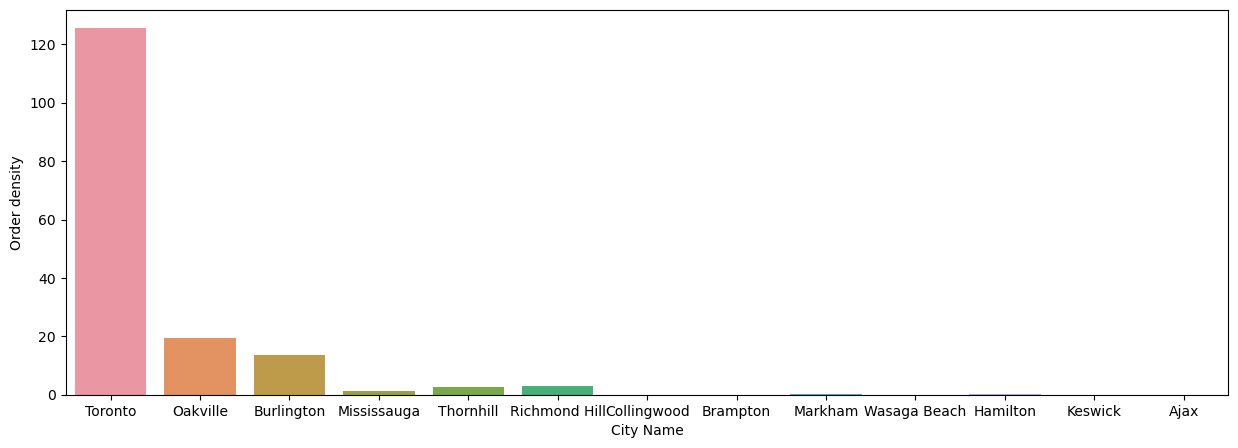

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(x = "City Name", y = "Order density", data=df_masterQ1)

In [76]:
df_master["Area"].value_counts()

GTA              81061
Ontario              5
Hamilton Area        1
Name: Area, dtype: int64

<Axes: xlabel='Order density', ylabel='City Name'>

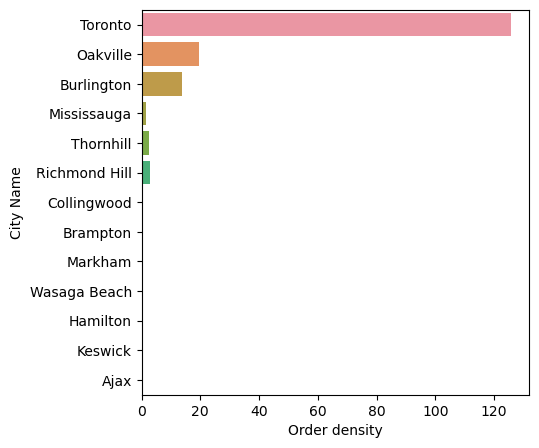

In [77]:
plt.figure(figsize=(5,5))
sns.barplot(x = "Order density", y = "City Name", data=df_masterQ1)

<Axes: xlabel='City Name', ylabel='Order density'>

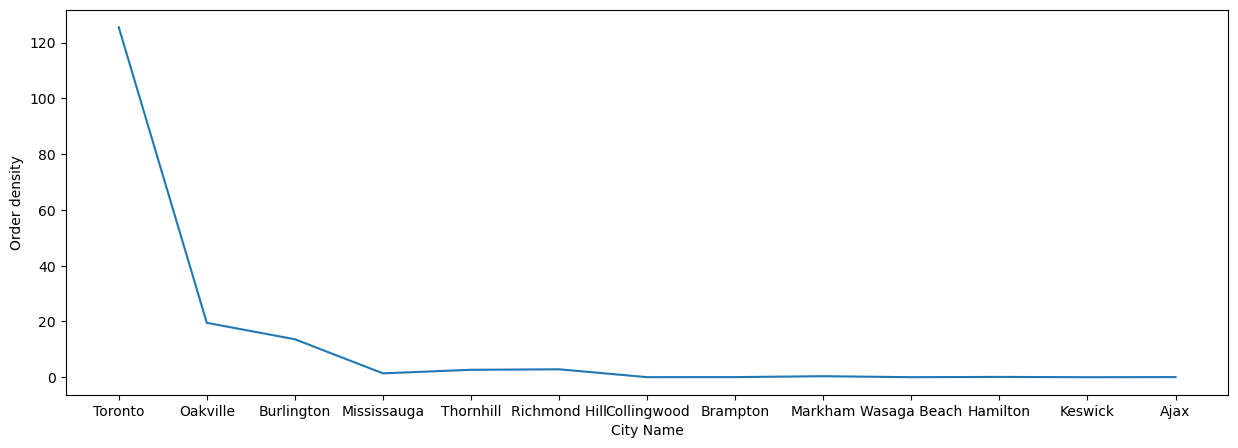

In [78]:
plt.figure(figsize=(15,5))
sns.lineplot(x = "City Name", y = "Order density", data=df_masterQ1)

### Q1.Order density per city in GTA and GME

In [79]:
# how many orders were delivered in GTA?
print(df_master["Area"].value_counts().loc["GTA"])
# how many orders were delivered in GMA?
try:
  df_master["Area"].value_counts().loc["GMA"]
except:
  print(0)

81061
0


In [80]:
try: #如果有error的话就会print Huni
  5/0
except:
  print("Huni")

Huni


In [81]:
# find orders per city and order density per city (order density = number of orders / area of the city)
df_master["City Name"].value_counts()

Toronto          75279
Oakville          2711
Burlington        2572
Mississauga        270
Thornhill          112
Richmond Hill      112
Collingwood          3
Brampton             2
Markham              2
Wasaga Beach         1
Hamilton             1
Keswick              1
Ajax                 1
Name: City Name, dtype: int64

In [82]:
df_masterArea = df_master["Geo Area km2"]
df_masterArea

0        18.58
1        18.58
2        18.58
3        18.58
4        18.58
         ...  
81448     3.21
81449     3.21
81450     3.21
81451     3.21
81452     3.21
Name: Geo Area km2, Length: 81453, dtype: float64

In [83]:
df_masterArea = df_masterArea.drop_duplicates()
df_masterArea

0        18.58
25        2.04
54        2.62
75        2.72
78        4.36
         ...  
30213    16.95
36316    19.74
36333    24.02
36360    21.02
81021    12.09
Name: Geo Area km2, Length: 131, dtype: float64

### Q2. Number of orders per week?(+graph)

In [84]:
# read master data to start analyze
#import all the packages
#import all the packages

import pandas as pd # to organize data
import numpy as np #to organize data
import matplotlib.pyplot as plt
#visuliaztion(graph)
%matplotlib inline
# visuliaztion(graph)
import seaborn as sns
# visuliaztion(graph)

df_master = pd.read_csv("C:/Users/franc/Desktop/python_class/datasets/Data - Master.csv")

In [85]:
df_master

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2,Quality Issue
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN


In [86]:
df_masterQ1

,City Name,Number of Orders,Geo Area km2,Order density,Area
0,Toronto,75279,NaN,125.559169,599.55
1,Oakville,2711,NaN,19.514829,138.92
2,Burlington,2572,NaN,13.626490,188.75
3,Mississauga,270,NaN,1.396720,193.31
4,Thornhill,112,NaN,2.668573,41.97
5,Richmond Hill,112,NaN,2.849873,39.30
6,Collingwood,3,NaN,0.026189,114.55
7,Brampton,2,NaN,0.044474,44.97
8,Markham,2,NaN,0.368324,5.43
9,Wasaga Beach,1,NaN,0.016697,59.89


In [87]:
df_masterQ2 = pd.DataFrame(columns = ['Week','Number of Orders'])
df_masterQ2

,Week,Number of Orders


In [88]:
week_list = df_master["Week"].value_counts(ascending=True).index.tolist()
order_Number = df_master["Week"].value_counts(ascending=True).tolist()
df_masterQ2["Week"] = week_list
df_masterQ2["Number of Orders"] = order_Number
df_masterQ2

,Week,Number of Orders
0,276,5121
1,277,5893
2,278,6424
3,284,7608
4,283,7707
5,286,7839
6,281,7967
7,285,8008
8,282,8094
9,279,8158


<Axes: xlabel='Number of Orders', ylabel='Week'>

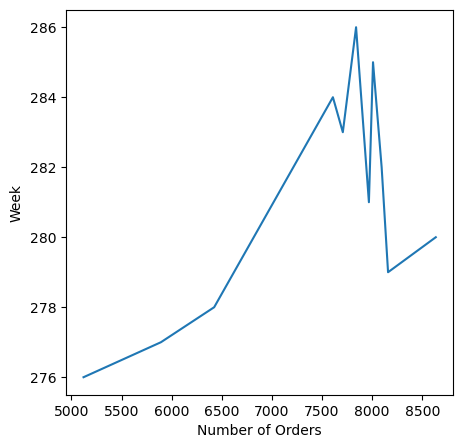

In [89]:
plt.figure(figsize=(5,5))
# sns.barplot(x = "Week", y = "Number of Orders", data=df_masterQ2)
sns.lineplot(x= "Number of Orders", y = "Week", data=df_masterQ2)

<Axes: xlabel='Week', ylabel='Number of Orders'>

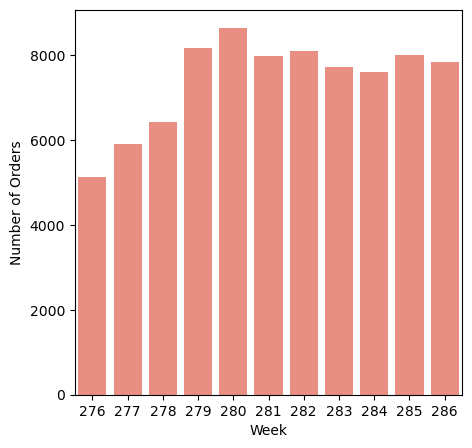

In [90]:
plt.figure(figsize=(5,5))
sns.barplot(x= "Week", y = "Number of Orders", data=df_masterQ2, color="salmon")

In [91]:
# printing the list of drivers without duplicated value.
df_masterQ3 = pd.DataFrame(columns = ["Driver ID"])
df_masterQ3
driver_information = df_master["Driver ID"].value_counts(ascending=True).index.tolist()
df_masterQ3["Driver ID"] = driver_information
df_masterQ3.drop_duplicates()
df_masterQ3

,Driver ID
0,491-qnj
1,520-czc
2,488-zhx
3,359-7cd
4,529-cmc
5,458-toe
6,505-e75
7,523-d5w
8,296-nd2
9,177-yxt


### Q3.Any relation between number of orders vs Weekdays?

In [92]:
df_master

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2,Quality Issue
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN


In [93]:
df_master["Day"]

0        Wednesday
1        Wednesday
2        Wednesday
3        Wednesday
4        Wednesday
           ...    
81448       Sunday
81449       Sunday
81450       Sunday
81451       Sunday
81452       Sunday
Name: Day, Length: 81453, dtype: object

In [94]:
days_list = ["Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday"]
len(days_list)

6

In [95]:
df_masterQ3 = pd.DataFrame(columns = ['Days','Number of Orders'])
df_masterQ3["Days"] = days_list
counts_list =[]
for i in range(len(days_list)):
  ordersDay = len(df_master[df_master["Day"] == days_list[i]])
  counts_list.append(ordersDay)
df_masterQ3["Number of Orders"] = counts_list

In [96]:
df_masterQ3

,Days,Number of Orders
0,Sunday,21068
1,Monday,18864
2,Tuesday,6562
3,Wednesday,9092
4,Thursday,15141
5,Friday,10726


<Axes: xlabel='Days', ylabel='Number of Orders'>

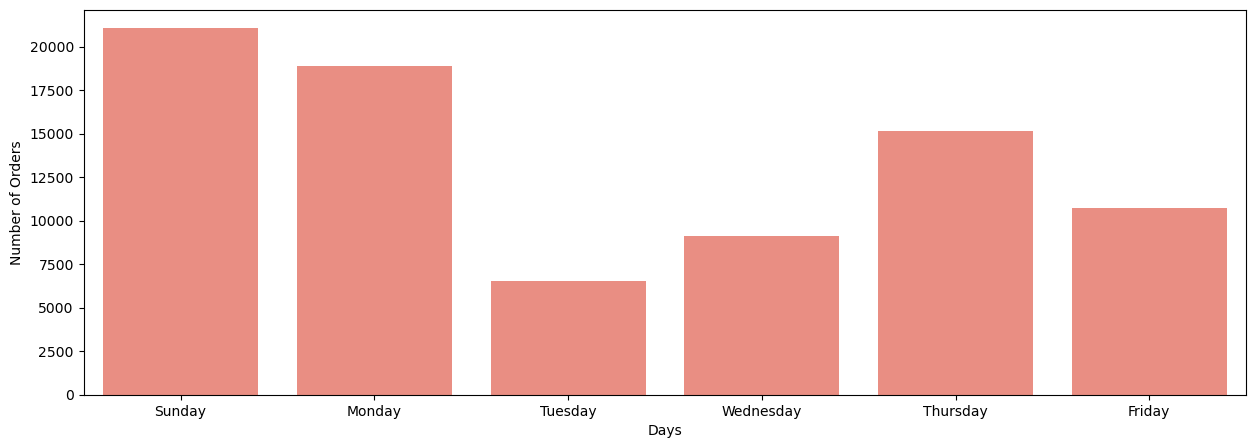

In [97]:
plt.figure(figsize=(15,5))
sns.barplot(x= "Days", y = "Number of Orders", data=df_masterQ3, color="salmon")

Q4. How many orders had quality issues? number of orders per issue type(graph)?

In [98]:
# number of orders with issues
withIssues = df_master["Quality Issue"].value_counts().sum()

In [99]:
df_master["Quality Issue"].value_counts()

Carrier Issue                          225
Carrier Delay                          224
Delivery Instructions Not Respected    127
Stolen Box                             120
Name: Quality Issue, dtype: int64

In [100]:
df_master["Quality Issue"].value_counts().index.tolist()

['Carrier Issue',
 'Carrier Delay',
 'Delivery Instructions Not Respected',
 'Stolen Box']

In [101]:
df_master["Quality Issue"].value_counts().tolist()

[225, 224, 127, 120]

### Q5. Find best and worst performing driver

In [102]:
df_master

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2,Quality Issue
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN


In [103]:
df_masterQ5 = pd.DataFrame(columns = ['Driver ID','Number of Orders', 'Number of Quality Issue','Performance of Driver'])
df_masterQ5

,Driver ID,Number of Orders,Number of Quality Issue,Performance of Driver


In [104]:
driver_list = df_master["Driver ID"].value_counts(ascending=True).index.tolist()
numberOrder = df_master["Driver ID"].value_counts(ascending=True).tolist()
df_masterQ5['Driver ID'] = driver_list
df_masterQ5['Number of Orders'] = numberOrder
df_masterQ5

,Driver ID,Number of Orders,Number of Quality Issue,Performance of Driver
0,491-qnj,25,NaN,NaN
1,520-czc,30,NaN,NaN
2,488-zhx,50,NaN,NaN
3,359-7cd,62,NaN,NaN
4,529-cmc,70,NaN,NaN
5,458-toe,73,NaN,NaN
6,505-e75,78,NaN,NaN
7,523-d5w,117,NaN,NaN
8,296-nd2,119,NaN,NaN
9,177-yxt,119,NaN,NaN


In [105]:
counts_list =[]
counts_pDriver = []
for i in range(len(driver_list)):
  numberQuality = len(df_master[df_master["Driver ID"] == driver_list[i]]["Quality Issue"].dropna())
  counts_list.append(numberQuality)
  pDriver = counts_list [i]/ numberOrder [i]
  counts_pDriver.append(pDriver)

df_masterQ5["Number of Quality Issue"] = counts_list
df_masterQ5["Performance of Driver"] = counts_pDriver
df_masterQ5


,Driver ID,Number of Orders,Number of Quality Issue,Performance of Driver
0,491-qnj,25,0,0.000000
1,520-czc,30,3,0.100000
2,488-zhx,50,0,0.000000
3,359-7cd,62,9,0.145161
4,529-cmc,70,0,0.000000
5,458-toe,73,0,0.000000
6,505-e75,78,4,0.051282
7,523-d5w,117,0,0.000000
8,296-nd2,119,8,0.067227
9,177-yxt,119,0,0.000000


In [106]:
df_masterQ5.sort_values("Performance of Driver", ascending=False)

,Driver ID,Number of Orders,Number of Quality Issue,Performance of Driver
3,359-7cd,62,9,0.145161
1,520-czc,30,3,0.100000
8,296-nd2,119,8,0.067227
6,505-e75,78,4,0.051282
10,519-yql,138,5,0.036232
12,518-k9f,264,9,0.034091
20,300-ezy,577,16,0.027730
25,365-6d0,764,14,0.018325
29,483-5fi,1077,18,0.016713
37,426-1ua,1937,32,0.016520


In [107]:
df_masterQ5.sort_values("Performance of Driver", ascending=True)

,Driver ID,Number of Orders,Number of Quality Issue,Performance of Driver
0,491-qnj,25,0,0.000000
19,421-ome,563,0,0.000000
2,488-zhx,50,0,0.000000
27,487-jzc,891,0,0.000000
4,529-cmc,70,0,0.000000
5,458-toe,73,0,0.000000
15,413-x4l,293,0,0.000000
7,523-d5w,117,0,0.000000
23,157-3e5,596,0,0.000000
9,177-yxt,119,0,0.000000


In [108]:
#Just give me the names 1 for best and 1 for worst

In [109]:
highest = df_masterQ5[df_masterQ5['Number of Quality Issue'] == 0]
highest = df_masterQ5[df_masterQ5["Performance of Driver"] == df_masterQ5["Performance of Driver"].min()]
highest.sort_values(by=['Number of Orders'], ascending=False).iloc[0]["Driver ID"]

'487-jzc'

In [110]:
lowest = df_masterQ5.sort_values("Performance of Driver", ascending=False)
lowest.iloc[0]["Driver ID"]

'359-7cd'

### Q6. Make your own question and answer. Try to come up with an interesting finding

In [111]:
df_master

,Week,Day,Postal Code,FSA,Door Type,Order ID,Boxes,Driver ID,FSA Prefix,Province,FSA Type,Area,City Name,District,Geo Area km2,Quality Issue
0,277,Wednesday,L6J2P4,L6J,Maison,17749939,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
1,277,Wednesday,L6J2T8,L6J,Maison,17744736,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
2,277,Wednesday,L6J4S4,L6J,Maison,17737094,2,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
3,277,Wednesday,L6J4X6,L6J,Maison,17750410,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
4,277,Wednesday,L6J4Y2,L6J,Maison,17756612,1,107-n51,L,Ontario,URBAN,GTA,Oakville,Oakville,18.58,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81448,283,Sunday,M5P2L3,M5P,Maison,18278754,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81449,283,Sunday,M5P2V1,M5P,Maison,18322467,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81450,283,Sunday,M5P2V1,M5P,Maison,18329131,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN
81451,283,Sunday,M5P3B4,M5P,Maison,18311948,1,90-utu,M,Ontario,URBAN,GTA,Toronto,Central Toronto,3.21,NaN


In [112]:
## is there any relationship between day of oerder vs door type?

In [113]:
df_master["Door Type"].unique()

array(['Maison', 'Appartement avec portier qui accepte les colis',
       'Appartement sans portier', 'Duplex/Triplex', 'Bureau', 'Autre'],
      dtype=object)

In [114]:
###
# Maison >> House
# Appartement avec portier qui accepte les colis >> Condo
# Appartement sans portier >> Appartement
# Duplex/Triplex >> Duplex/Triplex
# Bureau >> Office
# Autre >> Other
df_master["Door Type"].replace({"Maison": "House",
                                "Appartement avec portier qui accepte les colis": "Condo",
                                "Appartement sans portier" : "Appartement",
                                "Bureau" : "Office",
                                "Autre" : "Other"}, inplace=True)

In [115]:
df_master["Door Type"].unique()

array(['House', 'Condo', 'Appartement', 'Duplex/Triplex', 'Office',
       'Other'], dtype=object)

In [116]:
df_master["Door Type"].value_counts()

House             40326
Condo             22492
Appartement       15032
Duplex/Triplex     1716
Other              1330
Office              557
Name: Door Type, dtype: int64

In [117]:
df_master["Day"].value_counts()

Sunday       21068
Monday       18864
Thursday     15141
Friday       10726
Wednesday     9092
Tuesday       6562
Name: Day, dtype: int64

In [118]:
df_masterQ6 = pd.DataFrame(columns = ["Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday"],
                           index=["House", "Condo","Appartement", "Duplex/Triplex", "Other", "Office"])

In [119]:
df_masterQ6

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
House,NaN,NaN,NaN,NaN,NaN,NaN
Condo,NaN,NaN,NaN,NaN,NaN,NaN
Appartement,NaN,NaN,NaN,NaN,NaN,NaN
Duplex/Triplex,NaN,NaN,NaN,NaN,NaN,NaN
Other,NaN,NaN,NaN,NaN,NaN,NaN
Office,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
for i in df_masterQ6.columns:
  DaysPerDoorType = df_master[df_master["Day"] == i]["Door Type"].value_counts()
  df_masterQ6[i] = DaysPerDoorType
df_masterQ6

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
House,7581,9589,3985,6117,7786,5268
Condo,8427,4976,1222,1412,3516,2939
Appartement,4368,3381,973,1091,3217,2002
Duplex/Triplex,413,380,168,176,337,242
Other,248,317,112,203,210,240
Office,31,221,102,93,75,35


<Axes: xlabel='Sunday'>

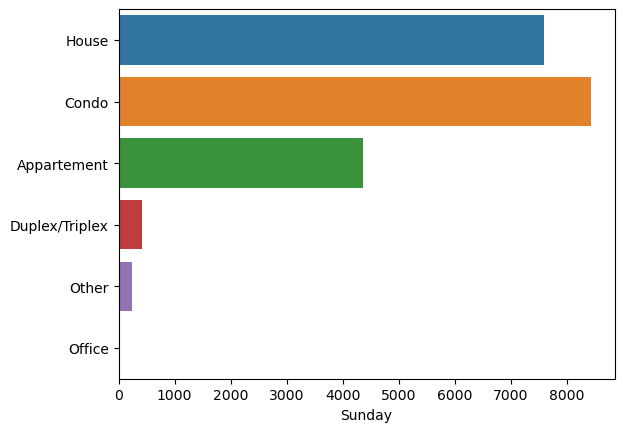

In [121]:
sns.barplot(data=df_masterQ6, x="Sunday",y=df_masterQ6.index)

ValueError: too many values to unpack (expected 6)

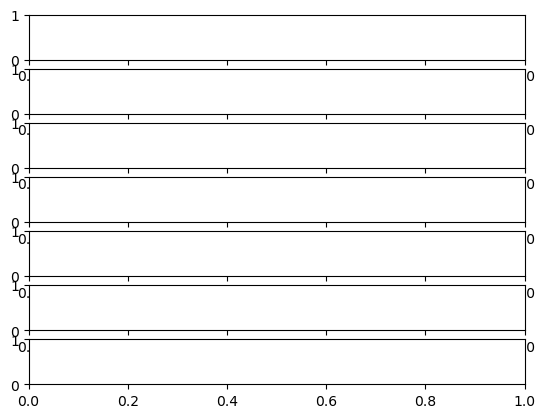

In [122]:
fig, (Sunday, Monday,Tuesday, Wednesday, Thursday, Friday) = plt.subplots(7)
fig.suptitle('Is there any relationship between day of oerder vs door type?')

In [123]:
df_masterQ6

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
House,7581,9589,3985,6117,7786,5268
Condo,8427,4976,1222,1412,3516,2939
Appartement,4368,3381,973,1091,3217,2002
Duplex/Triplex,413,380,168,176,337,242
Other,248,317,112,203,210,240
Office,31,221,102,93,75,35


In [124]:
df_masterQ6["Door Type"] = df_masterQ6.index
df_masterQ6

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Door Type
House,7581,9589,3985,6117,7786,5268,House
Condo,8427,4976,1222,1412,3516,2939,Condo
Appartement,4368,3381,973,1091,3217,2002,Appartement
Duplex/Triplex,413,380,168,176,337,242,Duplex/Triplex
Other,248,317,112,203,210,240,Other
Office,31,221,102,93,75,35,Office


In [125]:
df_masterQ6 = df_masterQ6.melt(id_vars='Door Type',var_name='day', value_name='count')

<Axes: xlabel='day', ylabel='count'>

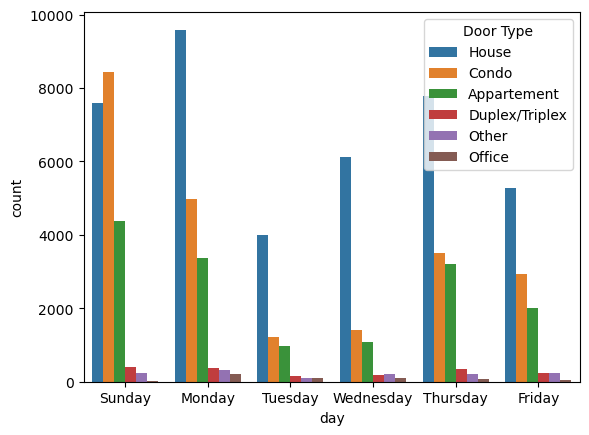

In [126]:
sns.barplot(data = df_masterQ6, x = "day", y = "count", hue = "Door Type")

<Axes: xlabel='Door Type', ylabel='count'>

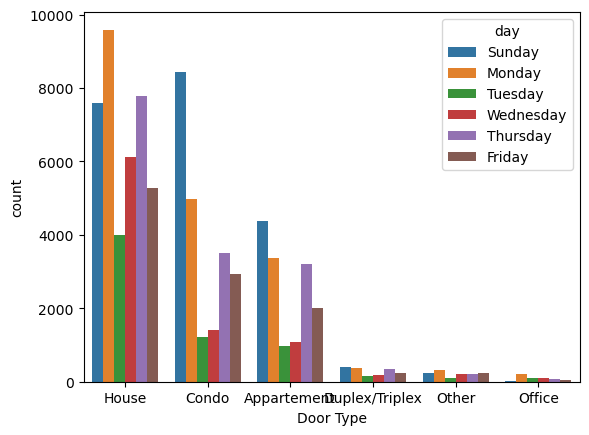

In [127]:
sns.barplot(data = df_masterQ6, x = "Door Type", y = "count", hue = "day")